#First Things First -> Clone Git to import data, utils etc.
Secondly, Mount Drive (mainly to save outputs).
Always keep current directory as cloned repo. Google Drive is only mounted to be able to save outputs. Never save any output in repo since repo can only accept less than 100MB files.

##Git

In [ ]:
# !git clone https://github.com/GitKPOrg/dl-project.git

Cloning into 'dl-project'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (32/32), done.
^C


In [ ]:
# import os

In [ ]:
# !pwd

In [ ]:
# !ls /content

In [ ]:
!git branch

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
# !ls -R /content


/content:
sample_data

/content/sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
# !ls -a /content/dl-project


ls: cannot access '/content/dl-project': No such file or directory


In [ ]:
# print("Current working directory:", os.getcwd())
# # print("Current working directory:")
# # !pwd

Current working directory: /content


In [ ]:
# %cd /content/dl-project/DL_Team_Project_Code_Files_Structure

[Errno 2] No such file or directory: '/content/dl-project/DL_Team_Project_Code_Files_Structure'
/content


In [ ]:
# print("Current working directory:", os.getcwd())
# # print("Current working directory:")
# # !pwd

Current working directory: /content


In [ ]:
# for d in /content/*; do
#   if [ -d "$d/.git" ]; then
#     echo "Git repo found: $d"
#   fi
# done


In [ ]:
# !for d in /content/*; do
# if [ -d "$d/.git" ]; then
#   echo "✅ Git repo found: $d"
# fi
# done


# !for d in /content/*; do
# # if [ -d "$d/.git" ]:
# #   echo "✅ Git repo found: $d"
# # if:
# #   done

In [ ]:
# !git fetch

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
# !git pull

fatal: not a git repository (or any of the parent directories): .git


##Mount Drive etc

In [1]:
##Run this cell once and then comment it out.
# !pip install -q transformers datasets huggingface_hub evaluate sentencepiece scikit-learn imbalanced-learn accelerate torch pandas matplotlib

In [2]:
##Run this cell once and then comment it out.
# !pip install -q --upgrade transformers datasets huggingface_hub

In [3]:
import os
os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_MODE"] = "offline"
os.environ["WANDB_SILENT"] = "true"

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

# GOOGLE_DRIVE_PATH = os.path.join('/content', 'drive', 'My Drive', 'ColabNotebooks', 'DL','Deep Learning Project Full','DL Team Project', '20251126_22.47_DL_Team_Project_Code_Files_Structure')
# GOOGLE_DRIVE_PATH = os.path.join('/content', 'drive', 'My Drive', 'ColabNotebook_KP_Kee', 'DLProject')
GOOGLE_DRIVE_PATH = os.path.join('/content', 'drive', 'My Drive', 'Colab Notebooks', 'DLProject')
print(os.listdir(GOOGLE_DRIVE_PATH))

['data', 'dl-project', 'configs', 'src', 'outputs', 'BackUp', 'BackUpMain 20251126_22.47_KP_DL_Project_ColabNotebook.ipynb', 'Copy of Copy of 20251126_22.47_KP_DL_Project_ColabNotebook.ipynb', 'Copy of BackUpMain 20251126_22.47_KP_DL_Project_ColabNotebook.ipynb', 'Exp3.3_bert-base-uncased_lr1e-06_bs32_ep3_20251209_042552_student_debug.ipynb', 'Exp3.4_bert-base-uncased_lr2e-05_bs32_ep3_20251209_044414_student_debug.ipynb', 'Exp3.2_bert-base-uncased_lr8e-05_bs32_ep3_20251209_031746_student_debug.ipynb', 'Exp3.5_bert-base-uncased_lr2e-05_bs32_ep3_20251209_045815_student_debug.ipynb', 'Exp3.6_bert-base-uncased_lr1e-05_bs32_ep3_20251209_073828_student_debug.ipynb', 'Exp3.7_bert-base-uncased_lr2e-05_bs32_ep3_20251209_074943_student_debug.ipynb', 'Exp3.1_200k_bert-base-uncased_lr2e-05_bs32_ep3_20251210_042609_student_debug.ipynb', 'Exp3.1_100k_bert-base-uncased_lr2e-05_bs32_ep3_20251210_045442_student_debug.ipynb', 'Exp3.1_20k_bert-base-uncased_lr2e-05_bs32_ep3_20251210_052215_student_debug.i

In [6]:
import sys

sys.path.append(GOOGLE_DRIVE_PATH)

In [7]:
GOOGLE_DRIVE_PATH

'/content/drive/My Drive/Colab Notebooks/DLProject'

In [8]:
# if running locally set GOOGLE PATH
import sys
if 'google.colab' in sys.modules:
  print(f'Running in google colab. Our path is `{GOOGLE_DRIVE_PATH}`')
else:
  GOOGLE_DRIVE_PATH = '.'
  print('Running locally.')

Running in google colab. Our path is `/content/drive/My Drive/Colab Notebooks/DLProject`


In [9]:
# print("Current working directory:", os.getcwd())

In [10]:
print("Current working directory:", os.getcwd())

Current working directory: /content


In [11]:
# # ch dir to project folder
# os.chdir(GOOGLE_DRIVE_PATH)

In [12]:
print("Current working directory:", os.getcwd())

Current working directory: /content


In [13]:
# import imp

In [14]:
# %load_ext autoreload
# # %reload_ext autoreload
# %autoreload 2

In [15]:
# optional: check torch & CUDA
import torch
print("torch:", torch.__version__, "cuda_available:", torch.cuda.is_available())

torch: 2.9.0+cu126 cuda_available: True


#**START HERE**
If not already done, complete running the First Things First Section before Starting Here

##Load Pre-Processed Data

Note: In Label3 class: 2 means positive rating, 1 means neutral and 0 means negative. (Useful for sentiment analysis).

In [16]:
# print("Current working directory:", os.getcwd())

##IGNORE THIS--->> Must be /content/dl-project/DL_Team_Project_Code_Files_Structure

In [17]:
GOOGLE_DRIVE_PATH

'/content/drive/My Drive/Colab Notebooks/DLProject'

In [18]:
#Just for Information: Number of rows in pre-processed data = 578,425
import pandas as pd
#Import pre-processed data
csv_path_train_data = f"{GOOGLE_DRIVE_PATH}/data/data_train.csv"
csv_path_val_data = f"{GOOGLE_DRIVE_PATH}/data/data_val.csv"
csv_path_test_data = f"{GOOGLE_DRIVE_PATH}/data/data_test.csv"


# #---------------------------------------
# #3. Load CSV
# #---------------------------------------
train_bal = pd.read_csv(csv_path_train_data)
val = pd.read_csv(csv_path_val_data)
test = pd.read_csv(csv_path_test_data)


# train_bal = pd.read_csv("/content/dl-project/DL_Team_Project_Code_Files_Structure/data/data_train.csv")
# val = pd.read_csv("/content/dl-project/DL_Team_Project_Code_Files_Structure/data/data_val.csv")
# test = pd.read_csv("/content/dl-project/DL_Team_Project_Code_Files_Structure/data/data_test.csv")

# ---------------------------------------
# 4. Keep only needed columns (drop lang)
# ---------------------------------------
train_bal = train_bal.drop(columns=["label5","lang"])   # remove lang and label 5 column
val = val.drop(columns=["label5","lang"])   # remove lang and label 5 column
test = test.drop(columns=["label5","lang"])   # remove lang and label 5 column

# train_bal = train_bal.drop(columns=["rating","label5","lang"])   # remove lang and label 5 column
# val = val.drop(columns=["rating","label5","lang"])   # remove lang and label 5 column
# test = test.drop(columns=["rating","label5","lang"])   # remove lang and label 5 column



#For training & deubgging choose only 2000 or so samples subset
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# >>>>>>>>>>>>>>>>>>>Disable below line for full training sample set which has total 578,425 rows (or data points)  <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# train_bal = train_bal.sample(n=100, random_state=42)

# OR if you only want these columns:
# df = df[["text", "rating", "label3", "label5"]]

print("Train:", train_bal.shape)
print("Val:", val.shape)
print("Test:", test.shape)

Train: (200000, 3)
Val: (20000, 3)
Test: (20000, 3)


In [19]:
train_bal = train_bal.sample(n=50000, random_state=42)

In [20]:
# val = val.sample(n=100, random_state=42)

In [21]:
# test = test.sample(n=100, random_state=42)

In [22]:
print("Train:", train_bal.shape)
print("Val:", val.shape)
print("Test:", test.shape)

Train: (50000, 3)
Val: (20000, 3)
Test: (20000, 3)


##Train & evaluate (set MODEL_NAME and hyperparams here) - Less Epochs used here to debug if the model is running fine or not

###**Train and then Print metrics (for less epochs training)**
Note: Be careful to choose correct Model and Hyper Parameters before you run below cells.

In [23]:
!pwd

/content


In [24]:
# OUTPUT_ROOT = os.path.join(GOOGLE_DRIVE_PATH, 'outputs')

In [25]:
# OUTPUT_ROOT

In [26]:
os.chdir(GOOGLE_DRIVE_PATH)

In [27]:
!pwd
#Must be /content/drive/My Drive/Colab Notebooks/DLProject

/content/drive/My Drive/Colab Notebooks/DLProject


In [28]:
# Cell B ver1: train & evaluate
from src.model import train_and_evaluate


# Set model and hyperparams here (free to change in notebook)
# MODEL_NAME = "distilbert-base-uncased"   # change to any HuggingFace model
MODEL_NAME = "bert-base-uncased"


num_labels = 3
training_args_overrides = {
    "per_device_train_batch_size": 32,
    "per_device_eval_batch_size": 32,
    "num_train_epochs": 3,
    "learning_rate": 2e-5,
    "weight_decay": 0.01,
    "logging_steps": 50,
    "gradient_accumulation_steps":1,
    "adam_beta1":0.9,
    "adam_beta2":0.999,
    "adam_epsilon":1e-8,
    "lr_scheduler_type": "linear",
    "warmup_steps":0.0,
    "warmup_ratio":0.1,
    "max-grad_norm":1.0,
}

#MODEL_CONFIGS
# install datasets if missing: pip install datasets
from datasets import Dataset
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased", use_fast=True)
def tokenize_batch(batch):
  # batch is a dict of lists when batched=True
  return tokenizer(batch["text"], truncation=True, max_length=256)
# remove text for train to save disk, keep for val/test

# If train_bal is a pandas DataFrame, convert:
train_ds = Dataset.from_pandas(train_bal.reset_index(drop=True))
val_ds   = Dataset.from_pandas(val.reset_index(drop=True))
test_ds  = Dataset.from_pandas(test.reset_index(drop=True))

# train_tok = train_ds.map(tokenize_batch, batched=True, remove_columns=["text", "rating"])
# val_tok = val_ds.map(tokenize_batch, batched=True, remove_columns=["text", "rating"])
# test_tok = test_ds  .map(tokenize_batch, batched=True, remove_columns=["text", "rating"])

# 1) rename label3 -> labels (if needed) and ensure ints
train_ds = train_ds.rename_column("label3", "labels") if "label3" in train_ds.column_names else train_ds
val_ds   = val_ds.rename_column("label3", "labels") if "label3" in val_ds.column_names else val_ds
test_ds  = test_ds.rename_column("label3", "labels") if "label3" in test_ds.column_names else test_ds

# #If your data are pandas DataFrames instead, do this first to convert/rename:
# df_train = df_train.rename(columns={"label3":"labels"})  # pandas rename
# # convert to HF Dataset
# from datasets import Dataset
# train_ds = Dataset.from_pandas(df_train.reset_index(drop=True))
# # repeat for val/test then follow the HF Dataset steps above


# make sure labels are ints (safe idempotent map)
train_ds = train_ds.map(lambda x: {"labels": int(x["labels"])}, num_proc=1)
val_ds   = val_ds.map(lambda x: {"labels": int(x["labels"])}, num_proc=1)
test_ds  = test_ds.map(lambda x: {"labels": int(x["labels"])}, num_proc=1)

##tokenize but DO NOT remove 'labels'
train_tok = train_ds.map(tokenize_batch, batched=True,
                         remove_columns=[c for c in train_ds.column_names if c in ("text","rating")])
val_tok   = val_ds.map(tokenize_batch, batched=True,
                       remove_columns=[c for c in val_ds.column_names if c in ("text","rating")])
test_tok  = test_ds.map(tokenize_batch, batched=True,
                        remove_columns=[c for c in test_ds.column_names if c in ("text","rating")])

# 3) set format to torch and include labels
train_tok.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_tok.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
test_tok.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])



res_train = train_and_evaluate(
    train_tok=train_tok,
    val_tok=val_tok,
    test_tok=test_tok,
    MODEL_NAME=MODEL_NAME,
    num_labels=num_labels,
    training_args_overrides=training_args_overrides,
    output_root="outputs",
    run_name_suffix="student_debug"
)

print("Train done. run_outdir:", res_train["run_outdir"])
print("Eval metrics:", res_train["eval"]["metrics"])

⚙️  Running in WANDB offline mode


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/content/drive/My Drive/Colab Notebooks/DLProject/src/model.py:116: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.430700,0.319383,0.873950,0.913488,0.873950,0.888172
2,0.319600,0.329589,0.874250,0.915871,0.874250,0.888706
3,0.255700,0.375034,0.871400,0.912185,0.871400,0.886243


Saved trainer history CSV to outputs/bert-base-uncased_lr2e-05_bs32_ep3_20251210_062027_student_debug/trainer_history.csv


Appended results to outputs/team_comparison_results.csv
Train done. run_outdir: outputs/bert-base-uncased_lr2e-05_bs32_ep3_20251210_062027_student_debug
Eval metrics: {'accuracy': 0.87175, 'precision': 0.9132715891229464, 'recall': 0.87175, 'f1': 0.8866710061864934, 'precision_per_class': [0.8940397350993378, 0.39826302729528534, 0.984801952909678], 'recall_per_class': [0.8185492926117224, 0.7337142857142858, 0.906428933826194], 'f1_per_class': [0.854630715123095, 0.5162846803377563, 0.9439915458937198], 'support_per_class': [4453, 1750, 13797], 'confusion_matrix': [[3645, 770, 38], [311, 1284, 155], [121, 1170, 12506]]}


In [29]:
# === SAVE TRUE LABELS & PRED LABELS (simple version) ===

import pandas as pd
import os

trainer = res_train["trainer"]
test_tok = res_train["test_tok"]
run_outdir = res_train["run_outdir"]

# Predict on test set
pred_out = trainer.predict(test_tok)

y_true = pred_out.label_ids
y_pred = pred_out.predictions.argmax(axis=-1)

# Save to CSV
df = pd.DataFrame({
    "true_label": y_true,
    "pred_label": y_pred
})

save_path = os.path.join(run_outdir, "true_pred_labels.csv")
df.to_csv(save_path, index=False)

print("Saved true vs predicted labels to:", save_path)


Saved true vs predicted labels to: outputs/bert-base-uncased_lr2e-05_bs32_ep3_20251210_062027_student_debug/true_pred_labels.csv


###Plot Curves (for less epochs training)

####General Plot Curve Code

Saved epoch CSV to: outputs/bert-base-uncased_lr2e-05_bs32_ep3_20251210_062027_student_debug/loss_per_epoch.csv
Saved loss plot to: outputs/bert-base-uncased_lr2e-05_bs32_ep3_20251210_062027_student_debug/loss_curve.png


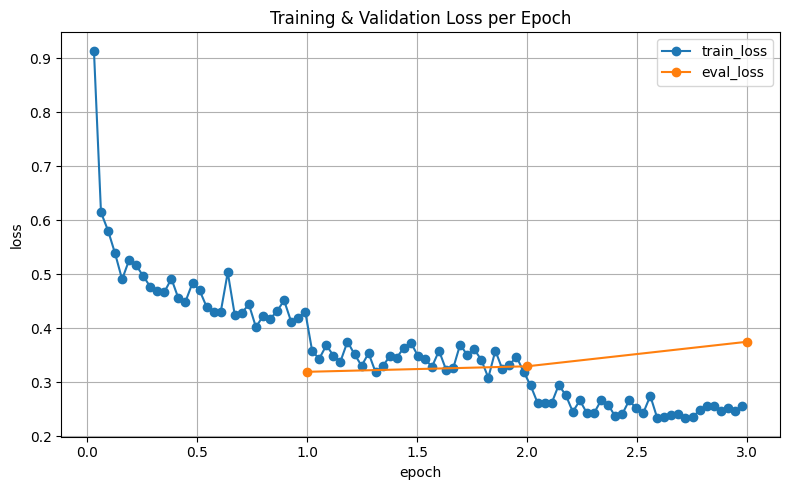

Epoch table (last training loss and eval loss per epoch):
       epoch  train_loss  eval_loss  learning_rate
0   0.031990      0.9135        NaN   1.979100e-05
1   0.063980      0.6143        NaN   1.957774e-05
2   0.095969      0.5808        NaN   1.936447e-05
3   0.127959      0.5384        NaN   1.915120e-05
4   0.159949      0.4904        NaN   1.893794e-05
..       ...         ...        ...            ...
91  2.879079      0.2475        NaN   8.104073e-07
92  2.911068      0.2525        NaN   5.971422e-07
93  2.943058      0.2461        NaN   3.838772e-07
94  2.975048      0.2557        NaN   1.706121e-07
95  3.000000         NaN   0.375034            NaN

[96 rows x 4 columns]


Classification Report:

              precision    recall  f1-score   support

           0     0.8940    0.8185    0.8546      4453
           1     0.3983    0.7337    0.5163      1750
           2     0.9848    0.9064    0.9440     13797

    accuracy                         0.8718     20000
   macro avg     0.7590    0.8196    0.7716     20000
weighted avg     0.9133    0.8718    0.8867     20000



<Figure size 600x600 with 0 Axes>

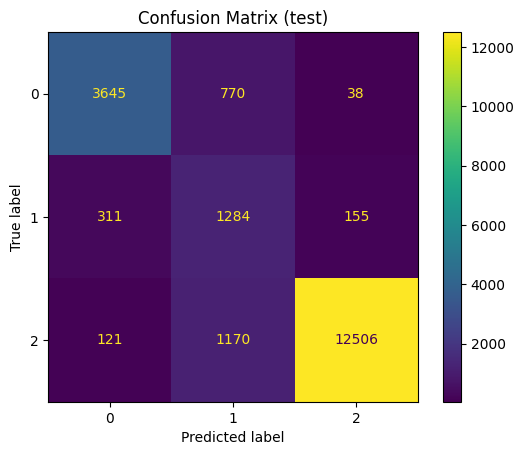

Saved loss plots and classification artifacts into: outputs/bert-base-uncased_lr2e-05_bs32_ep3_20251210_062027_student_debug


In [30]:
# COMBINED CELL: plot loss + save loss CSV + classification report + confusion matrix
from src.utils import plot_loss_vs_epochs
import os, json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

run_outdir = res_train["run_outdir"]

# 1) Loss plot
hist_csv = os.path.join(run_outdir, "trainer_history.csv")
df_epochs = plot_loss_vs_epochs(trainer=res_train.get("trainer"), hist_csv=hist_csv, run_outdir=run_outdir)
print("Epoch table (last training loss and eval loss per epoch):")
print(df_epochs)

# 2) Classification report + confusion matrix
trainer = res_train["trainer"]
test_tok = res_train["test_tok"]
pred_out = trainer.predict(test_tok)
y_true = pred_out.label_ids
y_pred = pred_out.predictions.argmax(axis=-1)

report = classification_report(y_true, y_pred, digits=4, output_dict=True)
# report = classification_report(y_true, y_pred, digits=4, output_dict=True)
# print("Classification report:")
# print(report)
from sklearn.metrics import classification_report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, digits=4))

with open(os.path.join(run_outdir, "classification_report_combined.json"), "w", encoding="utf-8") as fh:
    json.dump(report, fh, indent=2)
pd.DataFrame(report).transpose().to_csv(os.path.join(run_outdir, "classification_report_combined.csv"))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6,6))
disp.plot(values_format='d')
plt.title("Confusion Matrix (test)")
plt.savefig(os.path.join(run_outdir, "confusion_matrix_combined.png"), bbox_inches='tight')
plt.show()

print("Saved loss plots and classification artifacts into:", run_outdir)


'''
Quick reminders (simple)

To get a proper curve, train for 2 or more epochs (set num_train_epochs >= 2).

The in-session cell saves trainer_state_log_history.json and loss_per_epoch.csv to the run folder. The post-session cell reads those files so you don’t need to retrain.

If auto-find picks the wrong folder, paste run_outdir manually in Cell B or C.


'''

'''
Below is a tiny single-line notebook cell that auto-selects the most recent run folder under outputs/, prints its path, and loads both loss_per_epoch.csv (into df) and a trainer log JSON (trainer_state_log_history.json or trainer_state.json) into log. It prints how many rows/entries were loaded so you know it worked.
'''

In [31]:
# run_outdir = max([d for d in __import__('glob').glob('outputs/*') if __import__('os').path.isdir(d)], key=__import__('os').path.getmtime); print("run_outdir:", run_outdir); import json, pandas as pd, os; csv_path=os.path.join(run_outdir,'loss_per_epoch.csv'); df = pd.read_csv(csv_path) if os.path.exists(csv_path) else pd.DataFrame(); log_path=os.path.join(run_outdir,'trainer_state_log_history.json'); log = json.load(open(log_path)) if os.path.exists(log_path) else (json.load(open(os.path.join(run_outdir,'trainer_state.json'))) if os.path.exists(os.path.join(run_outdir,'trainer_state.json')) else None); print("loss_per_epoch rows:", len(df), " | log entries:", (len(log) if log else 0))


**If neither JSON exists, log will be None.**